In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Appointments Dataset

In [2]:
appointments = pd.read_csv('raw_data\\appointments.csv')
appointments.head()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


In [3]:
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'])

In [4]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    200 non-null    object        
 1   patient_id        200 non-null    object        
 2   doctor_id         200 non-null    object        
 3   appointment_date  200 non-null    datetime64[ns]
 4   appointment_time  200 non-null    object        
 5   reason_for_visit  200 non-null    object        
 6   status            200 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.1+ KB


In [5]:
appointments.describe()

,appointment_date
count,200
mean,2023-06-17 11:38:24
min,2023-01-01 00:00:00
25%,2023-03-27 18:00:00
50%,2023-06-10 00:00:00
75%,2023-09-15 12:00:00
max,2023-12-30 00:00:00


In [6]:
appointments.nunique()

appointment_id      200
patient_id           48
doctor_id            10
appointment_date    158
appointment_time     40
reason_for_visit      5
status                4
dtype: int64

In [7]:
appointments.isnull().sum()

appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64

In [8]:
appointments.duplicated().sum()

np.int64(0)

# Billing Dataset

In [9]:
billing = pd.read_csv('raw_data\\billing.csv')
billing.head()

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending


In [10]:
billing['bill_date'] = pd.to_datetime(billing['bill_date'])

In [11]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bill_id         200 non-null    object        
 1   patient_id      200 non-null    object        
 2   treatment_id    200 non-null    object        
 3   bill_date       200 non-null    datetime64[ns]
 4   amount          200 non-null    float64       
 5   payment_method  200 non-null    object        
 6   payment_status  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.1+ KB


In [12]:
billing.describe(include='all')

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
count,200,200,200,200,200.000000,200,200
unique,200,48,200,NaN,NaN,3,3
top,B001,P012,T001,NaN,NaN,Credit Card,Pending
freq,1,10,1,NaN,NaN,75,69
mean,NaN,NaN,NaN,2023-06-17 11:38:24,2756.249250,NaN,NaN
min,NaN,NaN,NaN,2023-01-01 00:00:00,534.030000,NaN,NaN
25%,NaN,NaN,NaN,2023-03-27 18:00:00,1563.412500,NaN,NaN
50%,NaN,NaN,NaN,2023-06-10 00:00:00,2828.165000,NaN,NaN
75%,NaN,NaN,NaN,2023-09-15 12:00:00,3836.627500,NaN,NaN
max,NaN,NaN,NaN,2023-12-30 00:00:00,4973.630000,NaN,NaN


In [13]:
billing.nunique()

bill_id           200
patient_id         48
treatment_id      200
bill_date         158
amount            200
payment_method      3
payment_status      3
dtype: int64

In [14]:
billing.isnull().sum()

bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64

In [15]:
billing.duplicated().sum()

np.int64(0)

# Doctors Dataset

In [16]:
doctors = pd.read_csv('raw_data\\doctors.csv')

In [17]:
doctors['doctor_name'] = doctors['first_name'] + ' ' + doctors['last_name']
doctors.rename(columns={'specialization': 'dr_specialization', 'phone_number':'dr_phone_number','years_experience':'dr_years_experience','hospital_branch':'dr_hospital_branch'}, inplace = True)

In [18]:
doctors.drop(['first_name','last_name'], axis = 1, inplace = True)

In [19]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   doctor_id            10 non-null     object
 1   dr_specialization    10 non-null     object
 2   dr_phone_number      10 non-null     int64 
 3   dr_years_experience  10 non-null     int64 
 4   dr_hospital_branch   10 non-null     object
 5   email                10 non-null     object
 6   doctor_name          10 non-null     object
dtypes: int64(2), object(5)
memory usage: 692.0+ bytes


In [20]:
doctors.head(12)

,doctor_id,dr_specialization,dr_phone_number,dr_years_experience,dr_hospital_branch,email,doctor_name
0,D001,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,David Taylor
1,D002,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com,Jane Davis
2,D003,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com,Jane Smith
3,D004,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,David Jones
4,D005,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,Sarah Taylor
5,D006,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com,Alex Davis
6,D007,Oncology,8217493115,26,Westside Clinic,dr.robert.davis@hospital.com,Robert Davis
7,D008,Dermatology,9069162601,5,Westside Clinic,dr.linda.brown@hospital.com,Linda Brown
8,D009,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,Sarah Smith
9,D010,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,Linda Wilson


In [21]:
doctors.describe(include='all')

,doctor_id,dr_specialization,dr_phone_number,dr_years_experience,dr_hospital_branch,email,doctor_name
count,10,10,1.000000e+01,10.0000,10,10,10
unique,10,3,NaN,NaN,3,10,10
top,D001,Pediatrics,NaN,NaN,Central Hospital,dr.david.taylor@hospital.com,David Taylor
freq,1,5,NaN,NaN,4,1,1
mean,NaN,NaN,7.919716e+09,21.5000,NaN,NaN,NaN
std,NaN,NaN,1.142890e+09,6.7536,NaN,NaN,NaN
min,NaN,NaN,6.176384e+09,5.0000,NaN,NaN,NaN
25%,NaN,NaN,6.792438e+09,19.5000,NaN,NaN,NaN
50%,NaN,NaN,8.269752e+09,23.5000,NaN,NaN,NaN
75%,NaN,NaN,8.937722e+09,26.0000,NaN,NaN,NaN


In [22]:
doctors.nunique()

doctor_id              10
dr_specialization       3
dr_phone_number        10
dr_years_experience     8
dr_hospital_branch      3
email                  10
doctor_name            10
dtype: int64

In [23]:
doctors.isnull().sum()

doctor_id              0
dr_specialization      0
dr_phone_number        0
dr_years_experience    0
dr_hospital_branch     0
email                  0
doctor_name            0
dtype: int64

In [24]:
doctors.duplicated().sum()

np.int64(0)

# Patients Dataset

In [25]:
patients = pd.read_csv('raw_data\\patients.csv')

In [26]:
patients[['date_of_birth','registration_date']] = patients[['date_of_birth','registration_date']].apply(pd.to_datetime)

In [27]:
patients['patient_name'] = patients['first_name'] + ' ' + patients['last_name'] 
patients.drop(['first_name', 'last_name'], axis = 1, inplace = True)

In [28]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          50 non-null     object        
 1   gender              50 non-null     object        
 2   date_of_birth       50 non-null     datetime64[ns]
 3   contact_number      50 non-null     int64         
 4   address             50 non-null     object        
 5   registration_date   50 non-null     datetime64[ns]
 6   insurance_provider  50 non-null     object        
 7   insurance_number    50 non-null     object        
 8   email               50 non-null     object        
 9   patient_name        50 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 4.0+ KB


In [29]:
patients.head(10)

,patient_id,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email,patient_name
0,P001,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com,David Williams
1,P002,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com,Emily Smith
2,P003,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com,Laura Jones
3,P004,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com,Michael Johnson
4,P005,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com,David Wilson
5,P006,M,1963-06-16,7561777264,321 Maple Dr,2022-10-02,HealthIndia,INS613758,linda.jones@mail.com,Linda Jones
6,P007,F,1989-06-08,6278710077,789 Pine Rd,2021-12-25,MedCare Plus,INS465890,alex.johnson@mail.com,Alex Johnson
7,P008,F,1976-07-05,7090558393,456 Oak Ave,2021-05-25,WellnessCorp,INS545101,david.davis@mail.com,David Davis
8,P009,M,1971-12-11,7060324619,321 Maple Dr,2022-09-18,PulseSecure,INS136631,laura.davis@mail.com,Laura Davis
9,P010,M,2001-10-13,7081396733,123 Elm St,2022-08-24,WellnessCorp,INS866577,michael.taylor@mail.com,Michael Taylor


In [30]:
patients.describe(include='all')

,patient_id,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email,patient_name
count,50,50,50,5.000000e+01,50,50,50,50,50,50
unique,50,2,NaN,NaN,4,NaN,4,50,39,39
top,P001,M,NaN,NaN,321 Maple Dr,NaN,MedCare Plus,INS840674,michael.taylor@mail.com,Michael Taylor
freq,1,31,NaN,NaN,19,NaN,18,1,3,3
mean,NaN,NaN,1980-07-07 04:48:00,7.817283e+09,NaN,2022-05-03 01:55:12,NaN,NaN,NaN,NaN
min,NaN,NaN,1950-01-26 00:00:00,6.141952e+09,NaN,2021-01-23 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,NaN,1967-03-26 12:00:00,7.065593e+09,NaN,2021-09-13 00:00:00,NaN,NaN,NaN,NaN
50%,NaN,NaN,1981-01-29 12:00:00,7.749927e+09,NaN,2022-03-24 12:00:00,NaN,NaN,NaN,NaN
75%,NaN,NaN,1993-04-13 00:00:00,8.599947e+09,NaN,2022-10-03 12:00:00,NaN,NaN,NaN,NaN
max,NaN,NaN,2005-05-15 00:00:00,9.900972e+09,NaN,2023-12-12 00:00:00,NaN,NaN,NaN,NaN


In [31]:
patients.nunique()

patient_id            50
gender                 2
date_of_birth         49
contact_number        50
address                4
registration_date     50
insurance_provider     4
insurance_number      50
email                 39
patient_name          39
dtype: int64

In [32]:
patients.isnull().sum()

patient_id            0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
patient_name          0
dtype: int64

In [33]:
patients.duplicated().sum()

np.int64(0)

# Treatments Dataset

In [34]:
treatments = pd.read_csv('raw_data\\treatments.csv')
treatments.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


In [35]:
treatments['treatment_date'] = pd.to_datetime(treatments['treatment_date'])

In [36]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   treatment_id    200 non-null    object        
 1   appointment_id  200 non-null    object        
 2   treatment_type  200 non-null    object        
 3   description     200 non-null    object        
 4   cost            200 non-null    float64       
 5   treatment_date  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.5+ KB


In [37]:
treatments.describe(include='all')

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
count,200,200,200,200,200.000000,200
unique,200,200,5,3,NaN,NaN
top,T001,A001,Chemotherapy,Standard procedure,NaN,NaN
freq,1,1,49,77,NaN,NaN
mean,NaN,NaN,NaN,NaN,2756.249250,2023-06-17 11:38:24
min,NaN,NaN,NaN,NaN,534.030000,2023-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,1563.412500,2023-03-27 18:00:00
50%,NaN,NaN,NaN,NaN,2828.165000,2023-06-10 00:00:00
75%,NaN,NaN,NaN,NaN,3836.627500,2023-09-15 12:00:00
max,NaN,NaN,NaN,NaN,4973.630000,2023-12-30 00:00:00


In [38]:
treatments.nunique()

treatment_id      200
appointment_id    200
treatment_type      5
description         3
cost              200
treatment_date    158
dtype: int64

In [39]:
treatments.isnull().sum()

treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64

In [40]:
treatments.duplicated().sum()

np.int64(0)

# Merging


In [41]:
merged_df = appointments.copy()
merged_df = pd.merge(merged_df, patients, on='patient_id', how = 'left')

In [42]:
merged_df = pd.merge(merged_df, doctors, on='doctor_id', how = 'left')

In [43]:
merged_df = pd.merge(merged_df, treatments, on='appointment_id', how = 'left')

In [44]:
merged_df = pd.merge(merged_df, billing, on='patient_id', how = 'left')

In [45]:
merged_df.head()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,gender,date_of_birth,contact_number,...,treatment_type,description,cost,treatment_date,bill_id,treatment_id_y,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,F,1950-01-26,8374657733,...,Chemotherapy,Basic screening,3941.97,2023-08-09,B001,T001,2023-08-09,3941.97,Insurance,Pending
1,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,F,1950-01-26,8374657733,...,Chemotherapy,Basic screening,3941.97,2023-08-09,B043,T043,2023-03-29,3207.25,Insurance,Failed
2,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,F,1950-01-26,8374657733,...,Chemotherapy,Basic screening,3941.97,2023-08-09,B093,T093,2023-04-09,1955.17,Credit Card,Failed
3,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,M,1981-01-08,8102183595,...,MRI,Advanced protocol,4158.44,2023-06-09,B002,T002,2023-06-09,4158.44,Insurance,Paid
4,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,M,1981-01-08,8102183595,...,MRI,Advanced protocol,4158.44,2023-06-09,B047,T047,2023-05-02,1454.20,Insurance,Failed


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   appointment_id       1002 non-null   object        
 1   patient_id           1002 non-null   object        
 2   doctor_id            1002 non-null   object        
 3   appointment_date     1002 non-null   datetime64[ns]
 4   appointment_time     1002 non-null   object        
 5   reason_for_visit     1002 non-null   object        
 6   status               1002 non-null   object        
 7   gender               1002 non-null   object        
 8   date_of_birth        1002 non-null   datetime64[ns]
 9   contact_number       1002 non-null   int64         
 10  address              1002 non-null   object        
 11  registration_date    1002 non-null   datetime64[ns]
 12  insurance_provider   1002 non-null   object        
 13  insurance_number     1002 non-nul

In [47]:
df = merged_df[['appointment_id','appointment_date','appointment_time','gender','registration_date','patient_name','doctor_name','dr_specialization','dr_hospital_branch','treatment_type','cost','treatment_date','bill_date','amount','payment_method','payment_status']]
df.head()

,appointment_id,appointment_date,appointment_time,gender,registration_date,patient_name,doctor_name,dr_specialization,dr_hospital_branch,treatment_type,cost,treatment_date,bill_date,amount,payment_method,payment_status
0,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-08-09,3941.97,Insurance,Pending
1,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-03-29,3207.25,Insurance,Failed
2,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-04-09,1955.17,Credit Card,Failed
3,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-06-09,4158.44,Insurance,Paid
4,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-05-02,1454.20,Insurance,Failed


# Total and Average revenues per treatment, per doctor, or per patient?

## Total and Average Revenue per Treatment

In [48]:
print('Total Revenue per Treatment')
print('-------------------------------------------------')
print(df.groupby('treatment_type')['amount'].sum())
print('=================================================')
print('Average Revenue per Treatment')
print('-------------------------------------------------')
print(df.groupby('treatment_type')['amount'].mean())

Total Revenue per Treatment
-------------------------------------------------
treatment_type
Chemotherapy     662548.04
ECG              509745.97
MRI              535296.48
Physiotherapy    491818.42
X-Ray            548881.25
Name: amount, dtype: float64
Average Revenue per Treatment
-------------------------------------------------
treatment_type
Chemotherapy     2693.284715
ECG              2711.414734
MRI              3058.837029
Physiotherapy    2672.926196
X-Ray            2626.226077
Name: amount, dtype: float64


## Total and Average Revenue per Doctor

In [49]:
print('Total Revenue per Doctor')
print('-------------------------------------------------')
print(df.groupby('doctor_name')['amount'].sum())
print('=================================================')
print('Average Revenue per Doctor')
print('-------------------------------------------------')
print(df.groupby('doctor_name')['amount'].mean())

Total Revenue per Doctor
-------------------------------------------------
doctor_name
Alex Davis      339280.84
David Jones     191212.99
David Taylor    336851.92
Jane Davis      264650.98
Jane Smith      279957.14
Linda Brown     234358.03
Linda Wilson    304846.08
Robert Davis    188582.63
Sarah Smith     214192.66
Sarah Taylor    394356.89
Name: amount, dtype: float64
Average Revenue per Doctor
-------------------------------------------------
doctor_name
Alex Davis      2803.973884
David Jones     2619.356027
David Taylor    2611.255194
Jane Davis      3007.397500
Jane Smith      2641.105094
Linda Brown     2858.024756
Linda Wilson    2650.835478
Robert Davis    3041.655323
Sarah Smith     2549.912619
Sarah Taylor    2777.161197
Name: amount, dtype: float64


## Total and Average Revenue per Patient

In [50]:
print('Total Revenue per Patient')
print('-------------------------------------------------')
print((df.groupby('patient_name')['amount'].sum()).sort_values(ascending=False).head(10))
print('=================================================')
print('Average Revenue per Patient')
print('-------------------------------------------------')
print((df.groupby('patient_name')['amount'].mean()).sort_values(ascending=False).head(10))

Total Revenue per Patient
-------------------------------------------------
patient_name
Laura Davis        342756.96
Michael Taylor     286445.88
David Wilson       277731.22
Michael Wilson     228148.15
David Moore        164878.42
David Smith        108347.46
Robert Williams    105840.00
Robert Wilson       97565.85
Alex Moore          86965.67
Emily Miller        85412.40
Name: amount, dtype: float64
Average Revenue per Patient
-------------------------------------------------
patient_name
Robert Taylor    4662.050000
Alex Taylor      4412.063333
Laura Jones      3968.440000
Robert Wilson    3902.634000
Emily Jones      3864.440000
Jane Jones       3712.570000
Robert Miller    3433.005000
Emily Miller     3416.496000
Jane Moore       3364.913077
David Moore      3364.865714
Name: amount, dtype: float64


# Which treatments generate the most revenue?

In [51]:
df.groupby('treatment_type')['amount'].sum().sort_values(ascending=False)

treatment_type
Chemotherapy     662548.04
X-Ray            548881.25
MRI              535296.48
ECG              509745.97
Physiotherapy    491818.42
Name: amount, dtype: float64

# What is the average cost of different treatment types?

In [52]:
df.groupby('treatment_type')['cost'].mean()

treatment_type
Chemotherapy     2596.498618
ECG              2492.546809
MRI              3113.821714
Physiotherapy    2824.988750
X-Ray            2757.109904
Name: cost, dtype: float64

# Are there discrepancies in billing amounts for similar treatments?

In [53]:
df.groupby('treatment_type').head()

,appointment_id,appointment_date,appointment_time,gender,registration_date,patient_name,doctor_name,dr_specialization,dr_hospital_branch,treatment_type,cost,treatment_date,bill_date,amount,payment_method,payment_status
0,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-08-09,3941.97,Insurance,Pending
1,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-03-29,3207.25,Insurance,Failed
2,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-04-09,1955.17,Credit Card,Failed
3,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-06-09,4158.44,Insurance,Paid
4,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-05-02,1454.20,Insurance,Failed
5,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-05-09,3503.97,Cash,Failed
6,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-06-20,3605.02,Credit Card,Paid
7,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-12-08,935.04,Insurance,Paid
18,A005,2023-07-06,12:45:00,M,2021-10-16,Emily Williams,Jane Smith,Pediatrics,Eastside Clinic,ECG,582.05,2023-07-06,2023-07-06,582.05,Credit Card,Pending
19,A005,2023-07-06,12:45:00,M,2021-10-16,Emily Williams,Jane Smith,Pediatrics,Eastside Clinic,ECG,582.05,2023-07-06,2023-12-24,2259.08,Credit Card,Failed


# What are the most common payment methods and their success rates

In [54]:
df.groupby(['payment_method', 'payment_status']).head()

,appointment_id,appointment_date,appointment_time,gender,registration_date,patient_name,doctor_name,dr_specialization,dr_hospital_branch,treatment_type,cost,treatment_date,bill_date,amount,payment_method,payment_status
0,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-08-09,3941.97,Insurance,Pending
1,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-03-29,3207.25,Insurance,Failed
2,A001,2023-08-09,15:15:00,F,2023-06-18,Alex Smith,Sarah Smith,Pediatrics,Central Hospital,Chemotherapy,3941.97,2023-08-09,2023-04-09,1955.17,Credit Card,Failed
3,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-06-09,4158.44,Insurance,Paid
4,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-05-02,1454.20,Insurance,Failed
5,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-05-09,3503.97,Cash,Failed
6,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-06-20,3605.02,Credit Card,Paid
7,A002,2023-06-09,14:30:00,M,2021-10-02,Alex Moore,David Jones,Pediatrics,Central Hospital,MRI,4158.44,2023-06-09,2023-12-08,935.04,Insurance,Paid
8,A003,2023-06-28,8:00:00,M,2023-06-19,Emily Miller,David Jones,Pediatrics,Central Hospital,MRI,3731.55,2023-06-28,2023-06-28,3731.55,Insurance,Paid
9,A003,2023-06-28,8:00:00,M,2023-06-19,Emily Miller,David Jones,Pediatrics,Central Hospital,MRI,3731.55,2023-06-28,2023-11-06,3690.71,Insurance,Paid


# Exploratory Data Analysis

# --- 1. Distribution of 'amount' and 'cost' ---

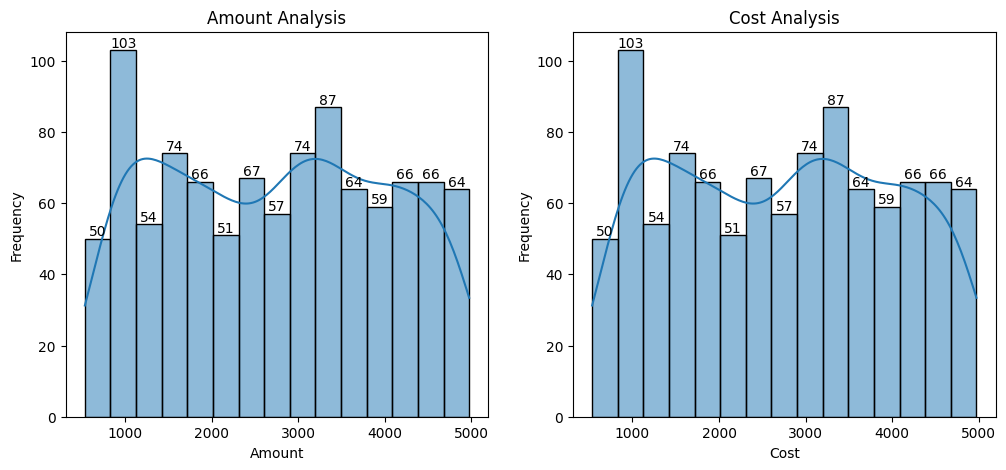

In [55]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
a1 = sns.histplot(df['amount'], kde = True, bins = 15)
for con in a1.containers:
    a1.bar_label(con)
plt.title('Amount Analysis')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
a2 = sns.histplot(df['cost'], kde = True, bins = 15)
for con in a2.containers:
    a2.bar_label(con)
plt.title('Cost Analysis')
plt.xlabel('Cost')
plt.ylabel('Frequency')

plt.savefig("amount_cost_analysis.png", dpi=300, bbox_inches='tight')

### Amount Summary

In [56]:
df['amount'].describe()

count    1002.000000
mean     2742.804551
std      1280.623652
min       534.030000
25%      1555.890000
50%      2835.770000
75%      3815.930000
max      4973.630000
Name: amount, dtype: float64

### Cost Summary

In [57]:
df['cost'].describe()

count    1002.000000
mean     2742.804551
std      1280.623652
min       534.030000
25%      1555.890000
50%      2835.770000
75%      3815.930000
max      4973.630000
Name: cost, dtype: float64

Text(0, 0.5, 'Frequency')

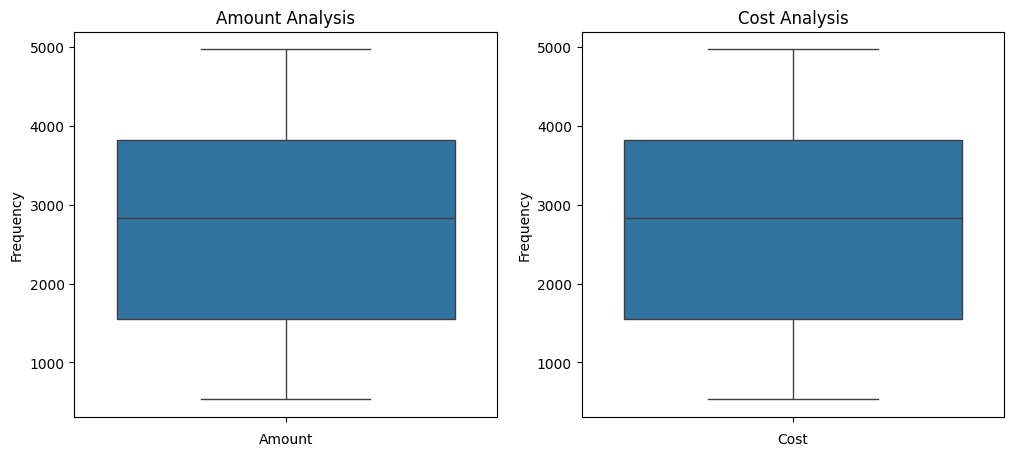

In [58]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['amount'])
plt.title('Amount Analysis')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(df['cost'])
plt.title('Cost Analysis')
plt.xlabel('Cost')
plt.ylabel('Frequency')

# --- 2. Count and proportion of 'payment_method' and 'payment_status' ---

In [59]:
df['payment_method'].value_counts()

payment_method
Credit Card    380
Insurance      318
Cash           304
Name: count, dtype: int64

In [60]:
payment_method_counts = df['payment_method'].value_counts()
payment_method_proportions = df['payment_method'].value_counts(normalize=True) * 100
payment_method_proportions

payment_method
Credit Card    37.924152
Insurance      31.736527
Cash           30.339321
Name: proportion, dtype: float64

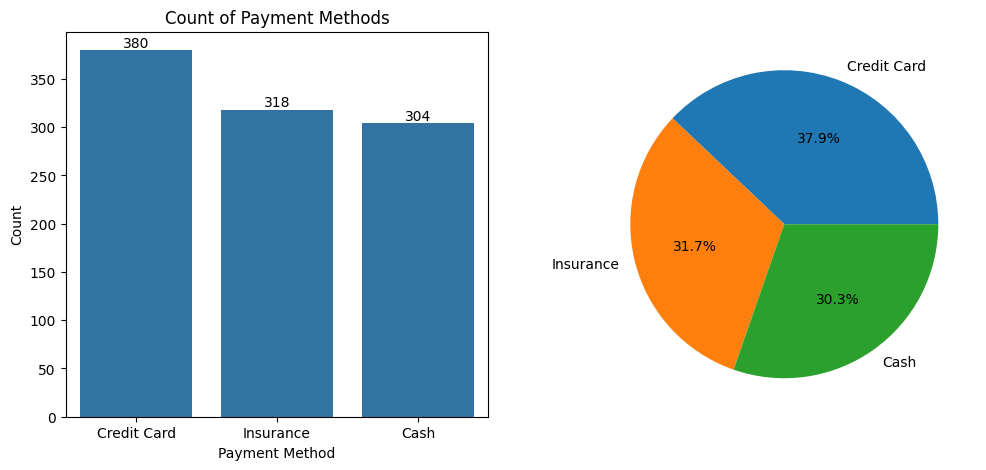

In [61]:
plt.figure(figsize= (12,5))

plt.subplot(1,2,1)
a1 = sns.barplot(x=payment_method_counts.index, y=payment_method_counts )
for con in a1.containers:
    a1.bar_label(con)
plt.title('Count of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(payment_method_proportions, labels= payment_method_proportions.index , autopct='%1.1f%%')

plt.savefig("payment_method.png", dpi=300, bbox_inches='tight')

In [62]:
payment_status_counts = df['payment_status'].value_counts()
payment_status_proportions = df['payment_status'].value_counts(normalize=True) * 100
payment_status_proportions

payment_status
Paid       35.029940
Failed     33.233533
Pending    31.736527
Name: proportion, dtype: float64

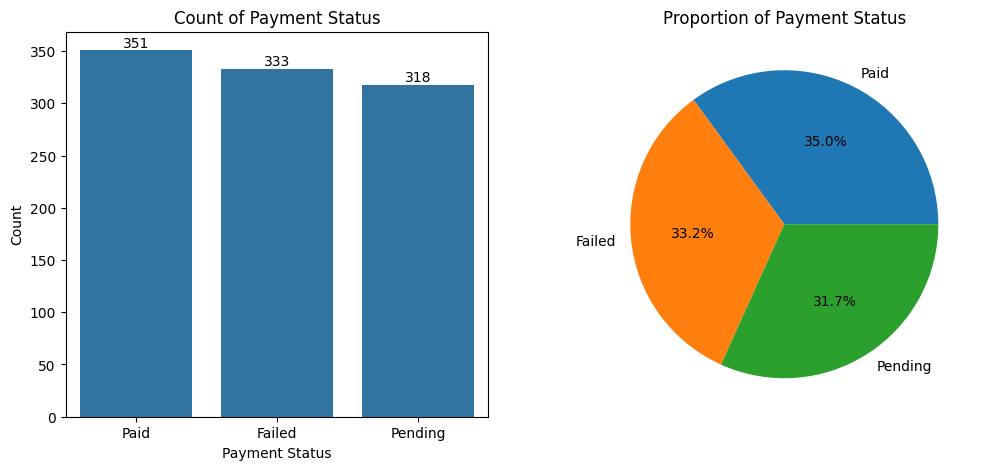

In [63]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
a1 = sns.barplot(x = payment_status_counts.index, y = payment_status_counts)
for con in a1.containers:
    a1.bar_label(con)
plt.title('Count of Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(payment_status_proportions, labels=payment_status_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Payment Status')

plt.savefig("payment_status.png", dpi=300, bbox_inches='tight')

# --- 3. Aggregations: Sum of 'amount' by 'treatment_type', by 'doctor_id' ---

In [64]:
amount_by_treatment = (df.groupby('treatment_type')['amount'].sum()).sort_values(ascending=False)
amount_by_doctor = (df.groupby('doctor_name')['amount'].sum()).sort_values(ascending=False)

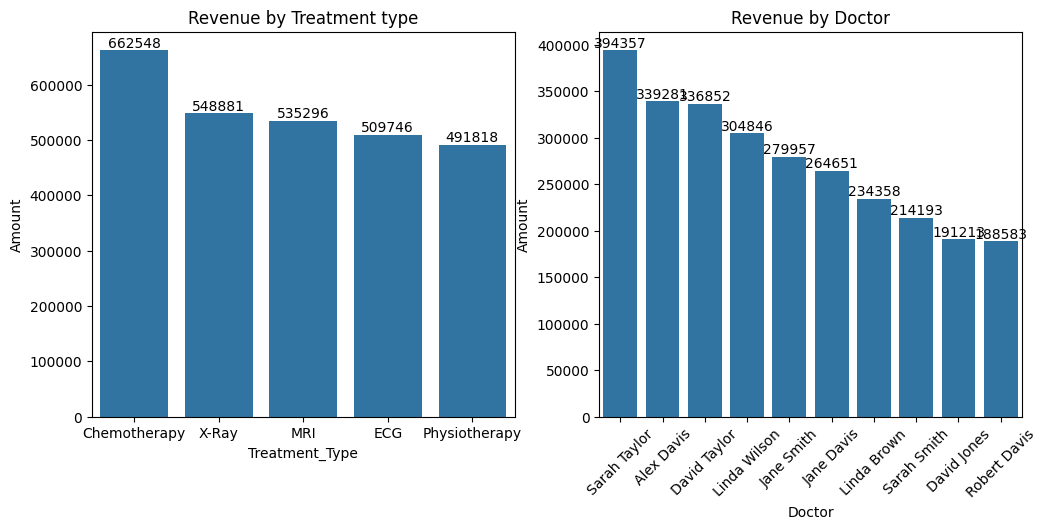

In [65]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
a1 = sns.barplot(amount_by_treatment)
for con in a1.containers:
    a1.bar_label(con)
plt.title('Revenue by Treatment type')
plt.xlabel('Treatment_Type')
plt.ylabel('Amount')

plt.subplot(1,2,2)
a2 = sns.barplot(amount_by_doctor)
for con in a2.containers:
    a2.bar_label(con)

plt.title('Revenue by Doctor')
plt.xlabel('Doctor')
plt.xticks(rotation=45)
plt.ylabel('Amount')

plt.savefig("revenue_treatment_doctor.png", dpi=300, bbox_inches='tight')

# --- 4. Revenue breakdown by patient_gender, patient_age_group, doctor_specialization. ---

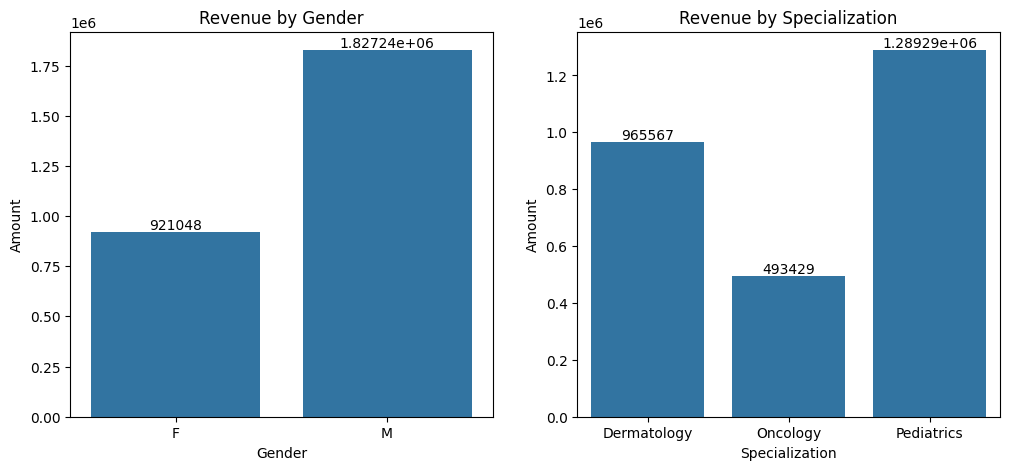

In [66]:
# Revenue breakdown by patient_gender, patient_age_group, doctor_specialization.

gender_revenue = df.groupby('gender')['amount'].sum()
specialization_revenue = df.groupby('dr_specialization')['amount'].sum()
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
a1 = sns.barplot(gender_revenue)
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
for pl in a1.containers:
    a1.bar_label(pl)

plt.subplot(1,2,2)
a2 = sns.barplot(specialization_revenue)
plt.title('Revenue by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Amount')
for pl in a2.containers:
    a2.bar_label(pl)

plt.savefig("revenue_gender_specialization.png", dpi=300, bbox_inches='tight')